Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

Initalially we need to import necessery libraries to do analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading dataset using pandas library and assigning dataset to the variable name data.

In [2]:
data = pd.read_csv('austo_automobile.csv')

Reading top 5 rows to know about the data column names present inside the dataframe.

In [3]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


1.	What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables).

Dataset is having 1581 rows(records) with 14 columns (features/variables).

The dataset conatins name of the column followed by datatypes along with the count of not null values/fields.
    The following are the datatypes present in the datsset: float64(1), int64(5), object(8).

In [4]:
data.shape

print("There are" ,data.shape[1],'columns and' ,data.shape[0], 'rows present in the dataset')

There are 14 columns and 1581 rows present in the dataset


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


2. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?

As we can the number of rows are 1581 but in gender and partner_salary column we can see the differnce in total number of not null values. 

Here we are extracting columns with null counts greater than 0. After extracting we get 2 columns with null counts greater than 0.

These type of columns can be handled either by imputing appropriate values or dropping fields when there is no clear values. 

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [7]:
data.isna().sum()[data.isnull().sum() > 0]

Gender             53
Partner_salary    106
dtype: int64

Here we are checking for the conditon where status of Partner_working is 'NO', through this we can conclude they are not working and their salary will be 0, with the help of this we can impute 0 in partner_salary wherever partner_working status is no

In [8]:
data['Partner_salary'] = data.groupby(data['Partner_working'] == 'No')['Partner_salary'].fillna(0)

For Gender, we can find 4 unique categories instead of 2 unique categories. These is due to typos while filling the field. It can be imputed by replacing with correct spelling. 

In [9]:
data['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [10]:
data['Gender'].replace(['Femal','Femle'],'Female', inplace=True)
data['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

Still we can notice 53 missing fields in the gender column. Those rows can be dropped as there no way to impute and also the missing values are less than 5% of the total records we can drop them.

In [11]:
data.isna().sum()[data.isnull().sum() > 0]

Gender    53
dtype: int64

In [12]:
data.dropna(subset=['Gender'], axis=0, inplace=True)

Now in the below line of code we can see there is no null values and number of records are 1528.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1528 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1528 non-null   object 
 3   Marital_status    1528 non-null   object 
 4   Education         1528 non-null   object 
 5   No_of_Dependents  1528 non-null   int64  
 6   Personal_loan     1528 non-null   object 
 7   House_loan        1528 non-null   object 
 8   Partner_working   1528 non-null   object 
 9   Salary            1528 non-null   int64  
 10  Partner_salary    1528 non-null   float64
 11  Total_salary      1528 non-null   int64  
 12  Price             1528 non-null   int64  
 13  Make              1528 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 179.1+ KB


3. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

Sol: Visualizing features of the data using appropriate plots/graphs.

a. Make(count)

•	From the below chart we can conclude that highest selling make/model in number is “Sedan”

•	Also HATCHBACK make counts is almost close to the “SEDAN”

•	“SUV” make is the least number of cars sold.

<AxesSubplot:xlabel='Make', ylabel='count'>

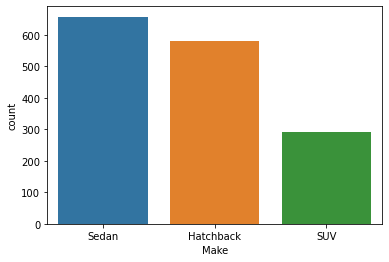

In [14]:
sns.countplot(data = data, x = 'Make', order = data['Make'].value_counts().index)

b. Make vs Price(Price Range)

From the above graph we can say 'SUV' make price is higher followed by 'SEDAN' and lowest price make is 'Hatchback' from the daatset

<AxesSubplot:xlabel='Make', ylabel='Price'>

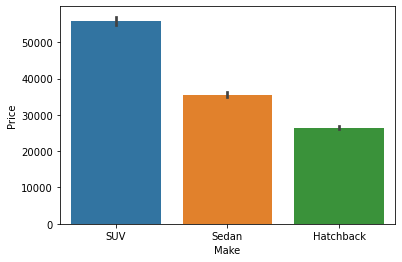

In [15]:
sns.barplot(x = 'Make', y = 'Price', data=data)

c. Make vs price

Revenue generated by each make

Here can find that 'SEDAN' as the highest Revenue made per make.

<AxesSubplot:ylabel='Make'>

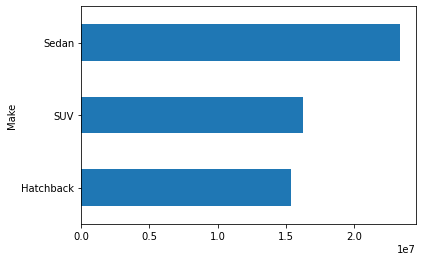

In [16]:
data.groupby('Make')['Price'].sum().plot(kind = 'barh')

d. Count of Make vs MArital Status

Here we can conclude that married customers are more likely to buy when compared to singles.

<AxesSubplot:xlabel='Make', ylabel='count'>

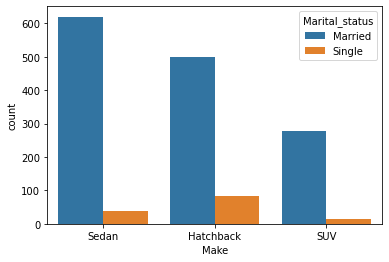

In [17]:
sns.countplot(data = data, x = 'Make', order = data['Make'].value_counts().index, hue = 'Marital_status')

e. Make vs Total Salary

Here higher the total salary they are likely to buy higher priced make i,e 'SUV'.

<AxesSubplot:xlabel='Make', ylabel='Total_salary'>

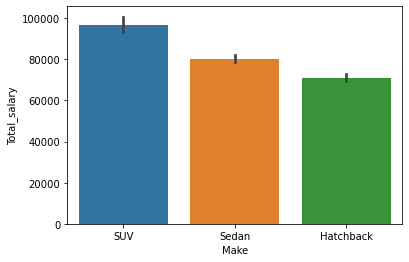

In [18]:
sns.barplot(data = data, x = 'Make', y = 'Total_salary')

f. Count of Make vs Gender

Here we can clearly see Males prefer to buy either 'SEDAN' or 'HATCHBACK' and Female are preferred to buy 'SUV'.

<AxesSubplot:xlabel='Make', ylabel='count'>

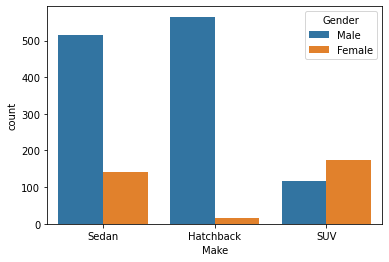

In [19]:
sns.countplot(data = data, x = 'Make', order = data['Make'].value_counts().index, hue = 'Gender')

4. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

From the below table we can find all the features are positively co-related with each other as there is no negative numbers in the table to show negative relationship.

In [20]:
cor = data.corr()
cor

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.185344,0.619373,0.121966,0.460623,0.798491
No_of_Dependents,-0.185344,1.000000,-0.039077,0.140078,0.092675,-0.124733
Salary,0.619373,-0.039077,1.000000,0.077454,0.639292,0.411713
Partner_salary,0.121966,0.140078,0.077454,1.000000,0.798058,0.151455
Total_salary,0.460623,0.092675,0.639292,0.798058,1.000000,0.365283
Price,0.798491,-0.124733,0.411713,0.151455,0.365283,1.000000


From the below graph we can see all the diagonal elements are 1, beacause they are representing to same column.

Here we can see 

<AxesSubplot:>

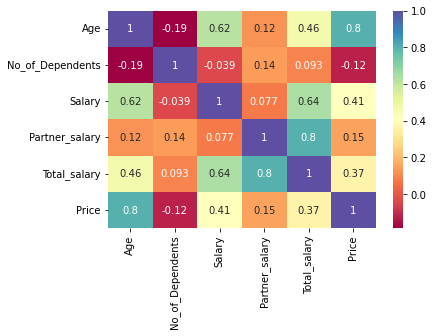

In [21]:
sns.heatmap(cor,annot=True,cmap='Spectral',)

The relationship between Salary and Partner_salary is 0.077 which is almost close to 0. Becuase each individual has salary field but only few has partner_salary field.

Age and Price is highly positive relationship as the age increases their salary will also increase and they can prefer cars based on price.

In [22]:
data.agg({'Salary':'sum','Partner_salary':'sum'})

Salary            92372800.0
Partner_salary    29245100.0
dtype: float64

The relationship between Salary and No_of_Dependents columns having variations, as there is no sequence in salary with repsect to No_of_Dependents 

In [23]:
data.groupby(['No_of_Dependents']).agg({'Salary': 'sum'})

,Salary
No_of_Dependents,
0,1122500
1,13989400
2,33050100
3,31543000
4,12667800


In [24]:
data.groupby(['No_of_Dependents']).agg({'Total_salary':'sum'})

,Total_salary
No_of_Dependents,
0,1122500
1,17286500
2,43919600
3,41919500
4,17945700


5. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

    5.1 Steve Roger says “Men prefer SUV by a large margin, compared to the women”

      Conclusion: Steve Roger statement can be concluded incorrect, as we can see in the below graph, female prefer to    buy SUV when compared to other two make.

<AxesSubplot:xlabel='Make', ylabel='count'>

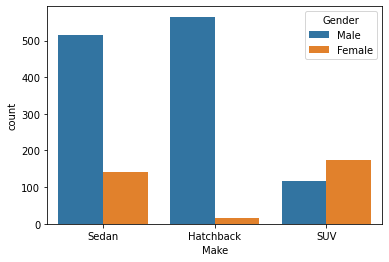

In [25]:
sns.countplot(data = data, x = 'Make', order = data['Make'].value_counts().index, hue = 'Gender')

In [26]:
data.groupby(['Gender','Make']).agg({'Make':'count'})

Make
Gender Make           
Female Hatchback    15
       SUV         173
       Sedan       141
Male   Hatchback   565
       SUV         118
       Sedan       516

5.2 Ned Stark believes that a salaried person is more likely to buy a Sedan.

   Conclusion: Ned Stark statement is true, as we can see in the below table, salaried person is more likely to buy SEDAN than other two makes.

In [27]:
data.groupby(['Profession','Make']).agg({'Make':'count'})

Make
Profession Make           
Business   Hatchback   289
           SUV          88
           Sedan       287
Salaried   Hatchback   291
           SUV         203
           Sedan       370

5.3 Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

   Conclusion: The statement by Sheldon Cooper is incorrect, as we can see from the below table, salaried male prefers to buy 'SEDAN' than ‘SUV’.

In [28]:
data.groupby(['Profession','Gender','Make']
                ).agg({'Make':'count'})

Make
Profession Gender Make           
Business   Female SUV          55
                  Sedan        50
           Male   Hatchback   289
                  SUV          33
                  Sedan       237
Salaried   Female Hatchback    15
                  SUV         118
                  Sedan        91
           Male   Hatchback   276
                  SUV          85
                  Sedan       279

F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.



Give justification along with presenting metrics/charts used for arriving at the conclusions.


F1) Gender: 

When comparing price of make with respect to gender, the ampunt spent to buy automobiles as clear diffrence between male and female. Amount spent by Male is 2 times more than female. Hence Automobile Companies can target Male customers while making personalized ads and promotion. And also Automobile companies need to come up with different strategies to attract female customers.

In [29]:
data.groupby(['Gender']).agg({'Price':'sum'})

,Price
Gender,
Female,15695000
Male,39348000


F2) Personal_loan:

According to above analysis amount spent on purchase of automobiles in case of person having Personal_loan Yes or NO doesn't make much difference as the values of both fields are almost similar. Hence, Company can concentrate on both type of customers.

In [30]:
data.groupby('Personal_loan').agg({'Price':'sum'})

,Price
Personal_loan,
No,28399000
Yes,26644000


G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

No, There is clear evidence from the current dataset, the data having working partner does not leads to buy higher-priced car.

From the below graph we can see the higher priced car is SUV

Below the graph there is table tells the count of each make with respect to Partner_working status. The number tells when data having working partner leads to buy either Hatchback or Sedan, both make as higher counts when compared to SUV 

<AxesSubplot:xlabel='Make', ylabel='Price'>

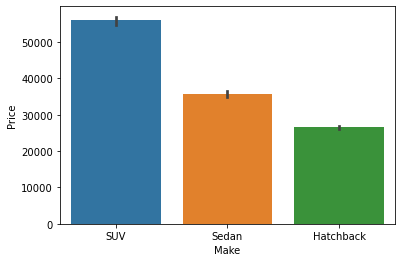

In [31]:
sns.barplot(x = 'Make', y = 'Price', data=data)

In [32]:
data.groupby(['Partner_working','Make']).agg({'Make':'count'})

Make
Partner_working Make           
No              Hatchback   279
                SUV         141
                Sedan       270
Yes             Hatchback   301
                SUV         150
                Sedan       387

H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

From the above table and graph, we can see the groups for Gender and Marital Status with respect to their preferred make or buy.
1.	Single Male preferred make:

Hatchback is most preferred make for single Male

2.	Married Male preferred make:

Married Male is either prefers Hatchback or Sedan as the numbers for both make are nearly close.

3.	Single Female preferred make:

Single Female customers hardly buy cars as the number tells only 22 out of 1528 which is not even 2%. And their most preferred make is Sedan

4.	Married Female preferred make:

Married Female more often buy SUV when compared to other two makes. Hatchback make are least preferred here.



In [33]:
data.groupby(['Gender','Marital_status','Make']).agg({'Make':'count'})

Make
Gender Marital_status Make           
Female Married        Hatchback    14
                      SUV         166
                      Sedan       127
       Single         Hatchback     1
                      SUV           7
                      Sedan        14
Male   Married        Hatchback   484
                      SUV         111
                      Sedan       493
       Single         Hatchback    81
                      SUV           7
                      Sedan        23

<AxesSubplot:ylabel='Gender,Marital_status,Make'>

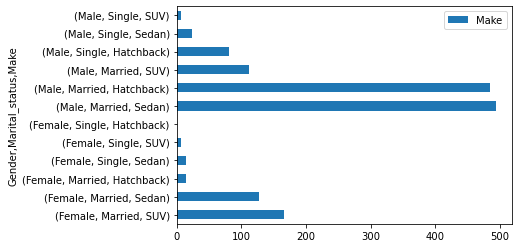

In [34]:
data.groupby(['Gender','Marital_status']).agg({'Make':'value_counts'}).plot(kind = 'barh')

<AxesSubplot:xlabel='Make', ylabel='count'>

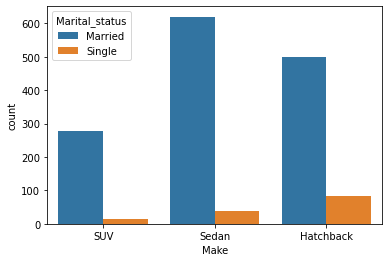

In [35]:
sns.countplot(data = data, x = 'Make', hue = 'Marital_status')

with respect to female and marital status is married:
    SUV are most preferred

Problem 2

In [36]:
card = pd.read_excel('godigt_cc_data.xlsx')

In [37]:
card.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [38]:
card.shape

(8448, 28)

In [39]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [40]:
card.isna().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [41]:
card['Issuer'].value_counts()

Visa          7279
Mastercard     728
Amex           441
Name: Issuer, dtype: int64

In [42]:
card.groupby('Issuer')['card_type'].value_counts()

Issuer      card_type 
Amex        gold           145
            rewards         88
            smartearn       87
            centurion       62
            platinum        59
Mastercard  rewards        122
            prime          111
            pulse          101
            elite           96
            indianoil       65
            cashback        63
            shoprite        60
            aura            58
            smartearn       52
Visa        rewards       1292
            prosperity    1007
            edge           980
            chartered      923
            shoprite       628
            smartearn      626
            indianoil      615
            cashback       613
            aura           594
            prime            1
Name: card_type, dtype: int64

In [43]:
card.groupby(['Occupation_at_source','card_type']).agg({'avg_spends_l3m' : 'sum'})

avg_spends_l3m
Occupation_at_source card_type                 
0                    centurion           672033
                     chartered          7022811
                     edge               8124744
                     elite               990120
                     gold                256274
...                                         ...
Student              prosperity         5400045
                     pulse               895955
                     rewards            3497993
                     shoprite           1630079
                     smartearn          1609854

[77 rows x 1 columns]